# Exercise: Pipeline

In this exercise, we aim to train a pipeline along with parameter tuning and perform prediction with the best model. More specifically we accomplish the following tasks: 

1. Develop a pipeline with feature extraction and linear regression models  
2. Perform grid search with the pipeline for optimizing some hyper-parameters
3. Evaluate the best model's performance
4. Identify the second best model 


The dataset we will be using for the dataset is face dataset.

## Face Data

(from SciKit Learn Docs)

This dataset is a collection of JPEG pictures of famous people collected over the internet, 
all details are available on the official website:

  *  http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. 
The typical task is called Face Verification: 
given a pair of two pictures, 
a binary classifier must predict whether the two images are from the same person.

An alternative task, 
Face Recognition or Face Identification is: 
given the picture of the face of an unknown person, 
identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

Both Face Verification and Face Recognition are tasks that are typically 
performed on the output of a model trained to perform Face Detection. 
The most popular model for Face Detection is called Viola-Jones and is 
implemented in the OpenCV library. 
The LFW faces were extracted by this face detector from various online websites.

---

# Import libs

In [1]:
# Import all the libs you need:

from time import time
import matplotlib.pyplot as plt
import pandas as pd

## Load necessary libraries

from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Load the Dataset
Load the dataset from sklearn datasets using `fetch_lfw_people`. Print the number of samples, features, and  classes.

In [2]:
# load the dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


# Visualize Some Sample Images
Randomly sample 9 images from the dataset and visualize them in a 3X3 grid with their labels. 

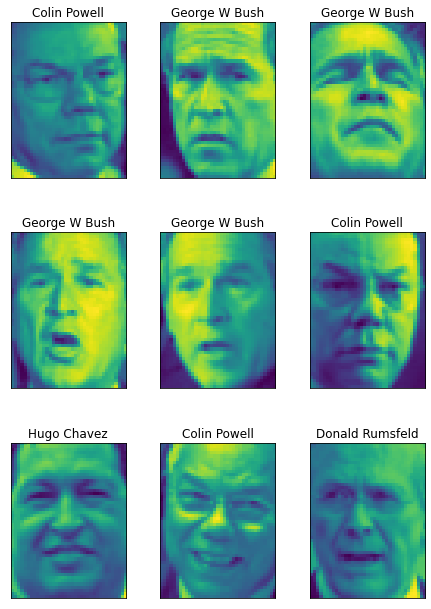

In [3]:
# visualize using matplot lib

from matplotlib import pyplot
import numpy as np

row = 3
col = 3
total_sample = len(lfw_people.data)

pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=2, hspace=.35)


for i in range(row*col):
    pyplot.subplot(row, col, i+1)
    random_index = np.random.randint(0, total_sample)
    single_label = np.copy(lfw_people.data[random_index, :])
    single_label = single_label.reshape((h,w))
    pyplot.title(target_names[lfw_people.target[random_index]], size=12)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.imshow(single_label)

# Split the dataset
Split the dataset into train (75%) and test (25%).

In [4]:
# split the dataset (E001)

X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size = .25)

# Build a Pipeline

Now we build a pipeline that performs feature extraction with PCA followed by classification using logistic regression. While developing the pipeline, we perform the following tasks. 

1. For PCA vary the `n_components` parameter and for logistic regression vary the regularization parameter `C`. Use at least 5 different values for each of these parameters. 
2. Use 10-fold cross validation while using the gridsearch


Note: If LogisticRegression doesn't converge increase the value for `max_iter`. 

## Define the pipeline


In [7]:
# Define the pipeline (E002)
pca_components = 20
logistic = LogisticRegression(max_iter = 10000, tol = 0.1)
pipe = Pipeline(steps=[("PCA", PCA(n_components = pca_components)), ("LogisticRegression", logistic)])



## Configure the Parameters for Grid Search

In [8]:
# Configure the parameters for grid search (E003)
from sklearn.model_selection import GridSearchCV


# select params list to do grid search here all the pramas name is concatenated with __ preceding the model name

# param configuration
param_grid = {'PCA__n_components': [20,30,40,50,60],
              'LogisticRegression__C': [1,10,100,1000,5000]}    
          


# Now build the pipeline again

clf_pipe = Pipeline([('PCA', PCA()), ('LogisticRegression',LogisticRegression(max_iter = 100000))])


## Train the Pipeline with Grid Search

In [9]:
# Train the Pipeline with Grid Search (E004)

model_grid = GridSearchCV(clf_pipe, param_grid = param_grid, cv = 10, n_jobs = 5)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('PCA', PCA()),
                                       ('LogisticRegression',
                                        LogisticRegression(max_iter=100000))]),
             n_jobs=5,
             param_grid={'LogisticRegression__C': [1, 10, 100, 1000, 5000],
                         'PCA__n_components': [20, 30, 40, 50, 60]})

Once the pipline is fitted, we can address the following tasks. 

## Show the parameters of the trained models and their rankings within this pipeline

In [23]:
# Show the parameters of the trained models and their rankings in a table (E005)
df = pd.DataFrame(model_grid.cv_results_)
paramrank = df[['params','param_LogisticRegression__C','param_PCA__n_components','rank_test_score']]
paramrank

,params,param_LogisticRegression__C,param_PCA__n_components,rank_test_score
0,"{'LogisticRegression__C': 1, 'PCA__n_component...",1,20,22
1,"{'LogisticRegression__C': 1, 'PCA__n_component...",1,30,14
2,"{'LogisticRegression__C': 1, 'PCA__n_component...",1,40,2
3,"{'LogisticRegression__C': 1, 'PCA__n_component...",1,50,6
4,"{'LogisticRegression__C': 1, 'PCA__n_component...",1,60,18
5,"{'LogisticRegression__C': 10, 'PCA__n_componen...",10,20,23
6,"{'LogisticRegression__C': 10, 'PCA__n_componen...",10,30,16
7,"{'LogisticRegression__C': 10, 'PCA__n_componen...",10,40,4
8,"{'LogisticRegression__C': 10, 'PCA__n_componen...",10,50,9
9,"{'LogisticRegression__C': 10, 'PCA__n_componen...",10,60,15


## Show the parameters of the best model

In [24]:
# Show the best model's parameters (E006)
best = df[df['rank_test_score'] == 1]
print(best.params)


model_grid.best_params_

22    {'LogisticRegression__C': 5000, 'PCA__n_compon...
Name: params, dtype: object


{'LogisticRegression__C': 5000, 'PCA__n_components': 40}

## Show the parameters of the second best model

In [27]:
# Show the parameters of the second best model (E007)
secondbest = df[df['rank_test_score'] == 2]
print(secondbest.params)
print('C of second best model',secondbest.param_LogisticRegression__C)
print('Number PCA components second best model',secondbest.param_PCA__n_components)

2    {'LogisticRegression__C': 1, 'PCA__n_component...
Name: params, dtype: object
C of second best model 2    1
Name: param_LogisticRegression__C, dtype: object
Number PCA components second best model 2    40
Name: param_PCA__n_components, dtype: object


## Show the mean and stddev of the test scores (i.e CV scores) for the second best model

In [13]:
# Show the mean and stddev of the test scores (i.e CV scores) for the second best model (E008)
print('second best mean test score',secondbest.mean_test_score)
print('second best std dev test score',secondbest.std_test_score)

second best mean test score 2    0.755735
Name: mean_test_score, dtype: float64
second best std dev test score 2    0.043413
Name: std_test_score, dtype: float64


## Evaluate the best model using the test data

Perform the following tasks: 

1. Make prediction
1. Show confusion matrix
1. Show classification task

In [14]:
# Make prediction (E009)
predicted_y = model_grid.predict(X_test)

In [15]:
# Show confusion matrix (E010)
pd.DataFrame(confusion_matrix(y_test, predicted_y))

,0,1,2,3,4,5,6
0,12,6,2,3,0,0,0
1,2,54,2,3,0,0,2
2,0,1,20,9,2,0,1
3,3,3,3,108,3,4,0
4,0,0,1,3,14,1,1
5,0,0,0,4,2,15,1
6,0,2,2,3,2,1,27


In [16]:
# Show the classification report (E011)
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        23
           1       0.82      0.86      0.84        63
           2       0.67      0.61      0.63        33
           3       0.81      0.87      0.84       124
           4       0.61      0.70      0.65        20
           5       0.71      0.68      0.70        22
           6       0.84      0.73      0.78        37

    accuracy                           0.78       322
   macro avg       0.74      0.71      0.72       322
weighted avg       0.78      0.78      0.77       322



# Save your Notebook, then `File > Close and Halt`